<a href="https://colab.research.google.com/github/EdsonJarandia/faixa_azul/blob/main/Faixa_Azul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Manipulação de dados
import pandas as pd
import geopandas as gpd

# Manipulação e visualização de dados espaciais
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

# Para trabalhar com APIs, como o Google Maps API
import requests
import json

# Configuração de gráficos
import seaborn as sns
sns.set(style="whitegrid")


In [ ]:
# Instalação de bibliotecas específicas
!pip install geopandas
!pip install shapely
!pip install folium


In [ ]:
import folium
from IPython.display import IFrame, display
from google.colab import files

# Lista de corredores Faixa Azul e suas coordenadas aproximadas
corredores = [
    {"nome": "Tiquatira – I (Avenida Governador Carvalho Pinto)", "coordenadas": [-23.5139, -46.5383]},
    {"nome": "Tiquatira – II (Avenidas Calim Eid/ Dom Hélder Câmara)", "coordenadas": [-23.5145, -46.5378]},
    {"nome": "Rua Vergueiro", "coordenadas": [-23.5859, -46.6358]},
    {"nome": "Avenida Inajar de Souza", "coordenadas": [-23.4788, -46.6596]},
    {"nome": "Av. Senador Teotônio Vilela", "coordenadas": [-23.7025, -46.6334]},
    {"nome": "Eixo Norte/Sul sentido Santana (Avenidas Moreira Guimarães, Rubem Berta e 23 de Maio)", "coordenadas": [-23.5760, -46.6622]},
    {"nome": "Av. Escola Politécnica", "coordenadas": [-23.5691, -46.7377]},
    {"nome": "Av. Dr. Ricardo Jafet", "coordenadas": [-23.6018, -46.6191]},
    {"nome": "Av. Prof. Abraão de Morais", "coordenadas": [-23.6238, -46.6286]},
    {"nome": "Rua Sapetuba", "coordenadas": [-23.5659, -46.7165]},
    {"nome": "Av. Jornalista Roberto Marinho", "coordenadas": [-23.6262, -46.6756]},
    {"nome": "Av. Eng. Armando de Arruda Pereira", "coordenadas": [-23.6476, -46.6453]},
    {"nome": "Estrada de Itapecerica", "coordenadas": [-23.6521, -46.7461]},
    {"nome": "Av. Pirajussara C/B", "coordenadas": [-23.6202, -46.7702]},
]

# Criando o mapa centralizado em São Paulo
mapa = folium.Map(location=[-23.5505, -46.6333], zoom_start=11)

# Adicionando marcadores para cada corredor
for corredor in corredores:
    folium.Marker(
        location=corredor["coordenadas"],
        popup=corredor["nome"],
        icon=folium.Icon(color='blue', icon='motorcycle')
    ).add_to(mapa)

# Salvando o mapa como arquivo HTML
mapa_filename = "corredores_faixa_azul.html"
mapa.save(mapa_filename)

# Exibir o mapa no Colab
display(mapa)

# Para baixar o mapa localmente
print("Clique no link abaixo para baixar o arquivo HTML do mapa.")
files.download(mapa_filename)




In [ ]:
import os
from IPython.display import IFrame

# Substitua pelo link "raw" do arquivo no GitHub
github_raw_url = "https://raw.githubusercontent.com/EdsonJarandia/faixa_azul/refs/heads/main/corredores_faixa_azul.html"

# Baixar o arquivo usando wget
os.system(f"wget -O corredores_faixa_azul.html {github_raw_url}")

# Exibir no Colab
display(IFrame("corredores_faixa_azul.html", width=800, height=600))



In [ ]:
import folium
import requests

# URL do GeoJSON contendo os limites municipais do estado de São Paulo
geojson_url = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-35-mun.json"

# Baixar os dados GeoJSON
response = requests.get(geojson_url)
geojson_data = response.json()

# Filtrar para obter apenas a cidade de São Paulo
sao_paulo_data = {
    "type": "FeatureCollection",
    "features": [
        feature for feature in geojson_data["features"]
        if feature["properties"]["name"] == "São Paulo"
    ]
}

# Criar o mapa centralizado na cidade de São Paulo
map_sp = folium.Map(location=[-23.55052, -46.633308], zoom_start=12)

# Adicionar o polígono da cidade de São Paulo ao mapa
folium.GeoJson(
    sao_paulo_data,
    name="São Paulo",
    style_function=lambda feature: {
        "fillColor": "#eee8be",  # Cor de preenchimento
        "color": "black",        # Cor da borda
        "weight": 2,             # Espessura da borda
        "fillOpacity": 0.6       # Transparência
    },
    tooltip=folium.GeoJsonTooltip(fields=["name"], aliases=["Município: "])
).add_to(map_sp)

# Download do mapa
map_sp.save("cidade_sao_paulo.html")
map_sp



In [ ]:
import folium
import requests

# URL do GeoJSON contendo os limites municipais do estado de São Paulo
geojson_url = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-35-mun.json"

# Baixar os dados GeoJSON
response = requests.get(geojson_url)
geojson_data = response.json()

# Filtrar para obter apenas a cidade de São Paulo
sao_paulo_data = {
    "type": "FeatureCollection",
    "features": [
        feature for feature in geojson_data["features"]
        if feature["properties"]["name"] == "São Paulo"
    ]
}

# Criar o mapa centralizado na cidade de São Paulo
map_sp = folium.Map(location=[-23.55052, -46.633308], zoom_start=12)

# Adicionar o polígono da cidade de São Paulo ao mapa
folium.GeoJson(
    sao_paulo_data,
    name="São Paulo",
    style_function=lambda feature: {
        "fillColor": "#eee8be",  # Cor de preenchimento
        "color": "black",        # Cor da borda
        "weight": 2,             # Espessura da borda
        "fillOpacity": 0.6       # Transparência
    },
    tooltip=folium.GeoJsonTooltip(fields=["name"], aliases=["Município: "])
).add_to(map_sp)

# Lista de corredores Faixa Azul e suas coordenadas aproximadas
corredores = [
    {"nome": "Tiquatira – I (Avenida Governador Carvalho Pinto)", "coordenadas": [-23.5139, -46.5383]},
    {"nome": "Tiquatira – II (Avenidas Calim Eid/ Dom Hélder Câmara)", "coordenadas": [-23.5145, -46.5378]},
    {"nome": "Rua Vergueiro", "coordenadas": [-23.5859, -46.6358]},
    {"nome": "Avenida Inajar de Souza", "coordenadas": [-23.4788, -46.6596]},
    {"nome": "Av. Senador Teotônio Vilela", "coordenadas": [-23.7025, -46.6334]},
    {"nome": "Eixo Norte/Sul sentido Santana (Avenidas Moreira Guimarães, Rubem Berta e 23 de Maio)", "coordenadas": [-23.5760, -46.6622]},
    {"nome": "Av. Escola Politécnica", "coordenadas": [-23.5691, -46.7377]},
    {"nome": "Av. Dr. Ricardo Jafet", "coordenadas": [-23.6018, -46.6191]},
    {"nome": "Av. Prof. Abraão de Morais", "coordenadas": [-23.6238, -46.6286]},
    {"nome": "Rua Sapetuba", "coordenadas": [-23.5659, -46.7165]},
    {"nome": "Av. Jornalista Roberto Marinho", "coordenadas": [-23.6262, -46.6756]},
    {"nome": "Av. Eng. Armando de Arruda Pereira", "coordenadas": [-23.6476, -46.6453]},
    {"nome": "Estrada de Itapecerica", "coordenadas": [-23.6521, -46.7461]},
    {"nome": "Av. Pirajussara C/B", "coordenadas": [-23.6202, -46.7702]},
]

# Adicionar marcadores para os corredores no mapa
for corredor in corredores:
    folium.Marker(
        location=corredor["coordenadas"],
        popup=corredor["nome"],
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(map_sp)

# Salvar e exibir o mapa
map_sp.save("mapa_sao_paulo_faixa_azul.html")
map_sp



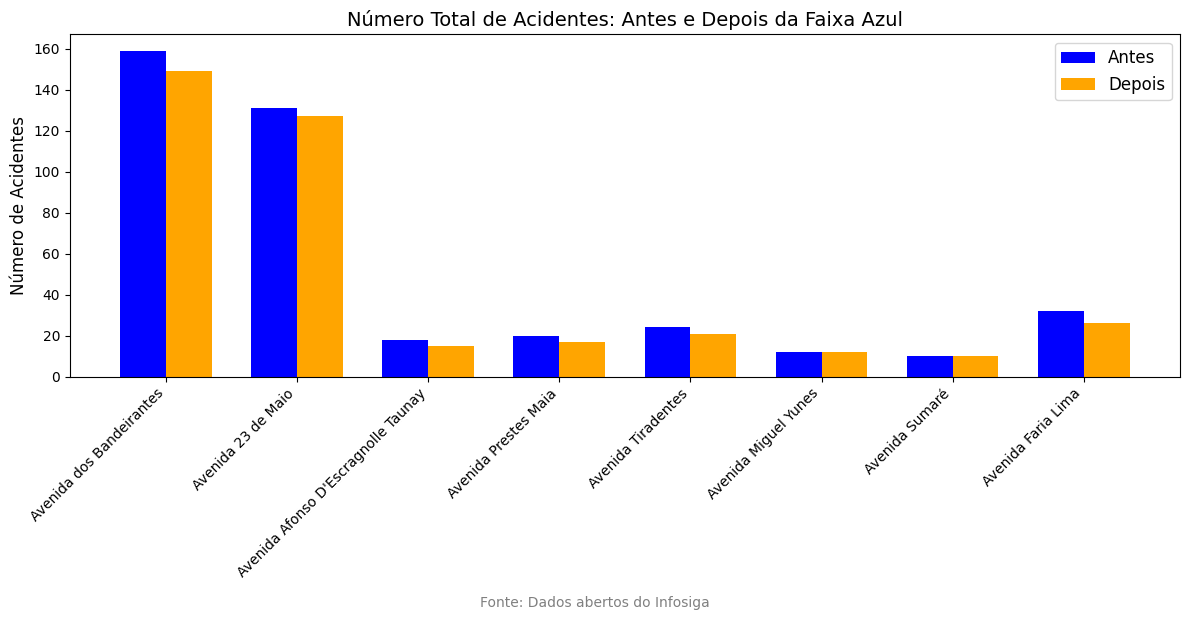

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados organizados em um dicionário
dados = {
    "Avenida": [
        "Avenida dos Bandeirantes",
        "Avenida 23 de Maio",
        "Avenida Afonso D'Escragnolle Taunay",
        "Avenida Prestes Maia",
        "Avenida Tiradentes",
        "Avenida Miguel Yunes",
        "Avenida Sumaré",
        "Avenida Faria Lima"
    ],
    "Antes": [159, 131, 18, 20, 24, 12, 10, 32],
    "Depois": [149, 127, 15, 17, 21, 12, 10, 26]
}

# Criar um DataFrame
df = pd.DataFrame(dados)

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Criar as barras
x = range(len(df))
largura = 0.35

# Plotar os dados
ax.bar(x, df["Antes"], width=largura, label="Antes", color="blue")
ax.bar([i + largura for i in x], df["Depois"], width=largura, label="Depois", color="orange")

# Adicionar os rótulos das avenidas
ax.set_xticks([i + largura / 2 for i in x])
ax.set_xticklabels(df["Avenida"], rotation=45, ha="right")

# Adicionar título e legendas
ax.set_title("Número Total de Acidentes: Antes e Depois da Faixa Azul", fontsize=14)
ax.set_ylabel("Número de Acidentes", fontsize=12)
ax.legend(fontsize=12)

# Fonte
fig.text(0.5, -0.02, "Fonte: Dados abertos do Infosiga", ha="center", fontsize=10, color="gray")

# Exibir o gráfico
plt.tight_layout()
plt.show()


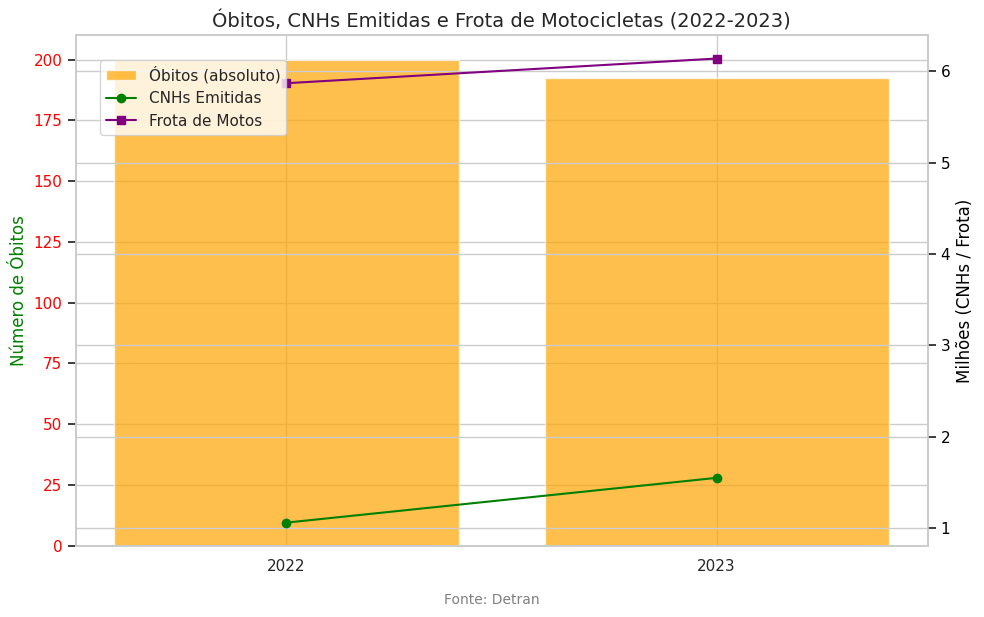

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
anos = ["2022", "2023"]
obitos = [200, 192.4]  # valores absolutos normalizados
cnhs_emitidas = [1.06, 1.55]  # em milhões
frota_motos = [5.87, 6.14]  # em milhões

fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de óbitos no eixo principal
ax1.bar(anos, obitos, color='orange', alpha=0.7, label="Óbitos (absoluto)")
ax1.set_ylabel("Número de Óbitos", fontsize=12, color='green')
ax1.tick_params(axis='y', labelcolor='red')

# Eixo secundário para CNHs e Frota
ax2 = ax1.twinx()
ax2.plot(anos, cnhs_emitidas, color='green', marker='o', label="CNHs Emitidas")
ax2.plot(anos, frota_motos, color='purple', marker='s', label="Frota de Motos")
ax2.set_ylabel("Milhões (CNHs / Frota)", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Legendas e título
ax1.set_title("Óbitos, CNHs Emitidas e Frota de Motocicletas (2022-2023)", fontsize=14)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Fonte
fig.text(0.5, -0.02, "Fonte: Detran", ha="center", fontsize=10, color="gray")

plt.tight_layout()
plt.show()


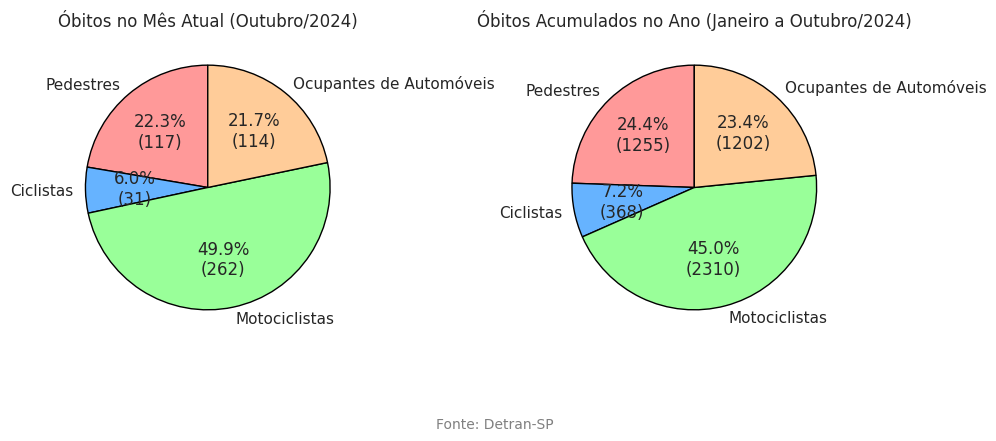

In [ ]:
import matplotlib.pyplot as plt

# Dados
categorias = ["Pedestres", "Ciclistas", "Motociclistas", "Ocupantes de Automóveis"]

# Dados do mês atual
mes_atual = [111, 30, 248, 108]
total_mes_atual = 527  # Total de óbitos no mês

# Dados do acumulado no ano
acumulado_ano = [1182, 347, 2175, 1132]
total_acumulado_ano = 5138  # Total de óbitos no ano

# Configuração das cores
cores = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]

# Gráfico 1: Mês Atual
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(
    mes_atual,
    labels=categorias,
    autopct=lambda p: f"{p:.1f}%\n({int(p * total_mes_atual / 100)})",
    colors=cores,
    startangle=90,
    wedgeprops={"edgecolor": "black"},
)
plt.title("Óbitos no Mês Atual (Outubro/2024)")

# Gráfico 2: Acumulado no Ano
plt.subplot(1, 2, 2)
plt.pie(
    acumulado_ano,
    labels=categorias,
    autopct=lambda p: f"{p:.1f}%\n({int(p * total_acumulado_ano / 100)})",
    colors=cores,
    startangle=90,
    wedgeprops={"edgecolor": "black"},
)
plt.title("Óbitos Acumulados no Ano (Janeiro a Outubro/2024)")

# Fonte
plt.figtext(0.5, 0.01, "Fonte: Detran-SP", ha="center", fontsize=10, color="gray")

# Exibir gráficos
plt.tight_layout()
plt.show()



**1. TÍTUTLO DO PROJETO:**

Análise da Eficiência e Otimização do Projeto Geométrico das Faixas Azuis em São
Paulo com Base em Dados de Fluxo e Segurança


**2. INTEGRANTES DO GRUPO:**

Jade Jacomini de Jesus

Larissa Damascena Da Silva

Edson Jandira Nunes


**3. POLO:**

 Jandira

**4. JUSTIFICATIVA:**

A cidade de São Paulo há anos está entre as cinco cidades com o pior trânsito do país, tendo sido considerada, em 2022, a cidade com o 48º pior trânsito do mundo (Nery, 2023). Além disso a taxa de acidentes, inclusive fatais, no trânsito da cidade aumenta a cada ano, sendo os motociclistas as principais vítimas fatais (Rodrigues, 2024).

Como proposta para mitigar esses problemas, surgiu a Faixa Azul, um projeto-piloto da cidade de São Paulo, inspirada em soluções adotadas na Malásia. Implementado de forma experimental pela Companhia de Engenharia de Tráfego (CET-SP), em 2022, na Avenida 23 de Maio, a Faixa Azul (ou motofaixa) teve considerável expansão na cidade de São Paulo, neste ano de 2024, chegando a mais de 200km de extensão, espalhada em várias vias da cidade.

A Prefeitura de São Paulo afirma que que a implementação da faixa promoveu redução do congestionamento e de acidentes graves, além de melhoria no fluxo (SECOM, 2024). Entretanto, alguns especialistas afirmam que não há estudos suficientes e de longo prazo que atestem essas melhorias.

Segundo Hamilton (2024), em 2006 foi proposto um projeto semelhante, pelo então secretário municipal de transportes, Alexandre de Moraes, que consistia na criação de uma via exclusiva para motocicletas, entretanto, em 2013, sete anos depois, foi constatado que tal metida não evitava mortes nem provocava melhorias no trânsito.

Para alguns especialistas a ampliação da Faixa Azul realizada no ano de 2024 trata-se apenas de medida eleitoreira, visto que o atual prefeito de São Paulo foi candidato à reeleição e o projeto era um de seus principais objetos de campanha.

Fato é que, os estudos sobre os resultados obtidos com a Faixa Azul, são incipientes, os resultados da adoção experimental da Faixa Azul são fornecidos pela Prefeitura, mas sem auditoria, portanto, pode ser interpretado como tendencioso, embora tal medida já esteja sendo adotada em outras cidades do país.

A escolha do estudo focado no eixo Norte-Sul se dá, pois é uma via que conecta importantes áreas da cidade, sendo uma das mais utilizadas e uma das vias que apresenta maior fluxo. Além disso, é uma via de tráfego misto, por ela circulam diariamente, além das motocicletas, automóveis, ônibus e caminhões. O eixo Norte-Sul possui ainda considerável histórico de acidentes, que podem ser reduzidos conforme resultados obtidos no estudo.

O estudo pode ainda fornecer subsídios técnicos para a expansão e otimização das Faixas Azuis em São Paulo e em outras cidades do país.

**5. DEFINIÇÃO DOS OBJETIVOS:**

O objetivo do projeto é, portanto, analisar, por meio de dados geoespaciais, e estatísticas de acidentes, o impacto e a eficiência da implantação da moto-faixa no trânsito de São Paulo, em termos de redução de acidentes.

Pretende-se, no trabalho final da disciplina ampliar a análise, utilizando também dados de tráfego e melhoria no fluxo, identificando, além da taxa de acidades, o índice de congestionamento das vias antes e depois da implementação do projeto. Dessa forma será sugerida a otimização do projeto da Faixa Azul para a via Norte-Sul, propondo intervenções no projeto original, tendo em vista que se trata de uma das principais vias da cidade, além de ser, segundo a CET, um dos trechos com maior engarrafamento em horários de pico.

**5.1	OBJETIVO GERAL DO TCC:**

Propor ajustes no projeto geométrico das faixas azuis no eixo Norte-Sul de São Paulo, com base em dados de fluxo e segurança, para melhorar a eficiência do trânsito e reduzir acidentes envolvendo motociclistas.

**5.2	OBJETIVOS ESPECÍFICOS DO PROJETO**

•	Identificar as vias em que foram implantadas as faixas azuis;

•	Levantar dados de números de acidentes antes e depois da implantação da Faixa Azul;

•	Identificar, de forma visual, os efeitos da implantação da Faixa Azul nas vias mapeadas.

**5.3	OBJETIVOS ESPECÍFICOS DO TCC:**

•	Identificar padrões de tráfego e segurança: Mapear pontos críticos de acidentes e gargalos no fluxo nas vias com faixas azuis em São Paulo.

•	Avaliar o desempenho atual das faixas azuis: Analisar métricas como velocidade média, tempo de viagem e número de acidentes antes e após a implementação das medidas.

•	Desenvolver mapas e relatórios técnicos: Produzir visualizações geoespaciais que orientem a tomada de decisão.

•	Propor ajustes geométricos: Sugerir alterações no alinhamento, largura e sinalização das faixas.

•	Simular cenários de melhoria: Usar ferramentas geoespaciais para modelar os impactos das propostas.

**6. METODOLOGIA DA PROJETO:**

Na primeira fase do trabalho foi feita a identificação dos corredores com Faixa Azul na cidade de São Paulo, por meio de dados vetoriais fornecidos pela CET-SP,

De posse desses dados foi possível mapear os principais cruzamentos de via em que a Faixa Azul foi implantada. Os dados foram exibidos por meio de marcadores no mapa do município gerado por meio do OpenStreetMap.

Também foram disponibilizados pela CET-SP dados estatísticos sobre a frota e quantitativo de acidentes na capital paulista. A segunda etapa consistiu em exibir, de forma visual, os dados estatísticos coletados. Em um primeiro gráfico foi identificado o número de acidentes nas vias mapeadas na primeira etapa, antes e depois da implantação da Faixa Azul.Um segundo gráfico identifica a quantidade de óbitos, de CNHs emitidas e da frota de motocicletas no município. Por fim, foi gerado um gráfico agrupando o número de óbito de acordo com o modal de transporte utilizado.


**6.1	METODOLOGIA PROPOSTA PARA O TCC:**

No trabalho final do curso espera-se além de identificar pontualmente as vias de São Paulo em que foram implantadas as Faixas Azuis, mapear os trechos dessas vias em que tal alternativa viária foi implementada. Neste projeto, dado o tempo limitado, foi feito o mapeado do índice de acidentes em todo o município, para o trabalho final pretende-se realizar um estudo mais aprofundado do fluxo e índice de acidentes nas vias antes e depois da implementação das motofaixas.

Esse estudo será concentrado na Avenida 23 de Maio, que foi a primeira a ter a solução implementada. Entretanto, havendo tempo hábil, o mesmo estudo será realizado nas outras vias do munícipio. Feito o estudo será possível identificar a eficiência da Faixa Azul, que servirá de base para a última etapa, que consistirá na elaboração de um estudo de otimização para a Faixa Azul do corredor Norte-Sul.

Como produto final, espera-se elaborar um projeto geométrico otimizado da via, além de soluções de intervenções que poderão ser ampliadas as outras vias do município.


**7. CONSIDERAÇÕES FINAIS:**

A implementação da Faixa Azul em vias de São Paulo, iniciada de forma experimental em 2022, teve como principal objetivo aumentar a segurança dos motociclistas, que historicamente representam as maiores vítimas fatais no trânsito da cidade.
A análise preliminar realizada com a elaboração do projeto permitiu constatar que a apesar da inovação da iniciativa, seus resultados ainda são preliminares e demandam uma avaliação mais aprofundada e contínua. A aplicação de dados geoespaciais e estatísticos permitiu uma compreensão inicial dos impactos das Faixas Azuis no eixo Norte-Sul, identificando oportunidades para melhorias na eficiência do trânsito e na segurança dos motociclistas.
Os resultados obtidos até o momento indicam que a proposta tem o potencial promissor de reduzir acidentes e melhorar o fluxo. Tais constatações são enfatizadas pelos gráficos gerados. Contudo, faz se necessário um acompanhamento e coleta de dados a longo prazo, além de estudos mais aprofundados. Ademais, acredita-se que ajustes no projeto geométrico e na sinalização podem maximizar seus benefícios.
No contexto do trabalho de conclusão do curso, espera-se aprofundar a análise e propor recomendações práticas para a otimização das Faixas Azuis. Além disso, o objetivo é que este estudo contribua para o desenvolvimento de soluções viárias mais seguras e eficientes, servindo como referência aplicável a outros municípios com desafios similares.
Por fim, o estudo reforça a relevância de intervenções urbanas cuidadosamente planejadas e executadas.


**8. REFERÊNCIAS BIBLIOGRÁFICAS**

CARVALHO, Hamilton. A faixa exclusiva de motos é boa e má ideia. Poder 360. São Paulo, 27 de abr. 2024. Disponível em: https://www.poder360.com.br/opiniao/a-faixa-exclusiva-de-motos-e-boa-e-ma-ideia/

PACKS, Gregory. Faixa azul SP: entenda como funciona o projeto. DOK. São Paulo, 18 de dez. 2023. Disponível em: https://www.despachantedok.com.br/blog/veiculo/faixa-azul-sp/

CET-SP. Faixa Azul – Informações Gerais. Companhia de Engenharia de Tráfego. Disponível em: https://www.cetsp.com.br/consultas/faixa-azul/informacoes-gerais.aspx.

DABANOVICH, Hebert. Corredor Norte-Sul e Marginal Pinheiros lideram congestionamento na Capital.  Gazeta de S. Paulo. São Paulo, 06 de jun. 2024. Disponível em: https://www.gazetasp.com.br/cotidiano/corredor-norte-sul-e-marginal-pinheiros-lideram-congestionamento-na/1138565/

IBGE - Cidade de São Pulo. Disponível em: https://www.ibge.gov.br/cidades-e-estados/sp/sao-paulo.html

MARTINS, Leandro. Mortes no trânsito no estado de São Paulo aumentam 23%. Agência Brasil. São Paulo, 01 de ago. 2024. Disponível em: https://agenciabrasil.ebc.com.br/geral/noticia/2024-08/mortes-no-transito-no-estado-de-sao-paulo-aumentam-23

NERY, Emily. Acha o trânsito de São Paulo ruim? Ele é só o 48º pior do mundo.  Auto Esporte. 18 de jan. 2023. Disponível em: https://autoesporte.globo.com/mobilidade/noticia/2023/01/acha-o-transito-de-sao-paulo-ruim-ele-e-so-o-48o-pior-do-mundo.ghtml

RODRIGUES, Patrícia. Motociclistas continuam a ser as maiores vítimas nas vias de São Paulo. Mobilidade Estadão. 23 de mai. 2024. Disponível em: https://mobilidade.estadao.com.br/meios-de-transporte/moto/por-que-motociclistas-continuam-a-ser-as-maiores-vitimas-nas-vias-de-sao-paulo/

SECOM. Levantamento aponta que trafegar na Faixa Azul é até 20 vezes mais seguro para motociclistas. São Paulo, 02 de mai. 2024. Disponível em: https://capital.sp.gov.br/w/levantamento-aponta-que-trafegar-na-faixa-azul-%C3%A9-at%C3%A9-20-vezes-mais-seguro-para-motociclistas%C2%A0


